In [1]:
from factor_transducer import *
import sentencepiece as spm
import k2

In [2]:
sp_model_path = "/exp/rhuang/meta/audio/examples/asr/librispeech_conformer_ctc/spm_unigram_1023.model"
sp = spm.SentencePieceProcessor(model_file=str(sp_model_path))

token2id = {sp.id_to_piece(i): i for i in range(sp.vocab_size())}
id2token = {v: k for k, v in token2id.items()}

del token2id[id2token[0]]
token2id["<eps>"] = 0
id2token[0] = "<eps>"

word_start_symbols = [i for i in range(sp.vocab_size()) if sp.id_to_piece(i).startswith('▁')]

In [20]:
text = "pen apple aaaz"
text_encoded = sp.encode(text, out_type=int)

# text_encoded = [24, 102, 70]
# text_encoded = [49, 11, 7, 161, 24]
# text_encoded = [49, 11, 7, 49, 49, 161, 24]

print(text_encoded)
print([sp.id_to_piece(p) for p in text_encoded])

[340, 15, 7, 208, 44, 7, 38, 38, 186]
['▁pe', 'n', '▁a', 'pp', 'le', '▁a', 'a', 'a', 'z']


In [4]:
# fst = make_factor_transducer1(text_encoded, return_str=False, blank_penalty=0)
# fst = make_factor_transducer2(text_encoded, return_str=False, blank_penalty=0)
fst = make_factor_transducer3(text_encoded, word_start_symbols, return_str=False, blank_penalty=0)

fst.labels_sym = k2.SymbolTable.from_str("\n".join([f"{k} {v}" for k, v in token2id.items()]))
fst.aux_labels_sym = fst.labels_sym

In [21]:
# fst = make_factor_transducer4(text_encoded, word_start_symbols, return_str=False, blank_penalty=0)
fst = make_factor_transducer4_skip(text_encoded, word_start_symbols, return_str=False, blank_penalty=0)

fst.labels_sym = k2.SymbolTable.from_str("\n".join([f"{k} {v}" for k, v in token2id.items()]))
fst.aux_labels_sym = k2.SymbolTable.from_str("\n".join([f"{v} {k+1}" for k, v in enumerate(text.split() + [None])]))

Num nodes: 21
Num arcs:  60


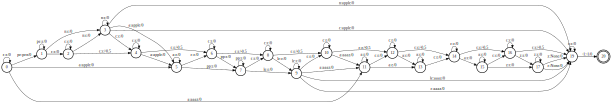

In [23]:
print(f"Num nodes: {fst.shape[0]}")
print(f"Num arcs:  {fst.num_arcs}")
k2.to_dot(fst)